In [2]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import necessary items from Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

#Importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
# from moviepy.editor import VideoFileClip

%matplotlib inline

Using TensorFlow backend.


In [3]:
# imread - It will read the image from the file and will return the multi dimensional numpy array 
# containing the relative instenisty of each pixel in the image


image = cv2.imread('test_image.jpg')
image[0]

array([[116,  91,  75],
       [194, 174, 134],
       [194, 174, 134],
       ...,
       [248, 238, 215],
       [248, 238, 215],
       [248, 238, 215]], dtype=uint8)

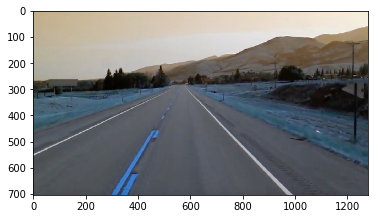

In [5]:
# For rendering the image 1st argument name of the window and second argument image itself
# cv2.imshow('Result',image)  # this function shows the image for miliseconds so we are not able to see it
# cv2.waitKey(0) # we keep this parameter to see the image - it sets the time for infinite until closed manually
plt.imshow(image)
# help(cv2.imshow)

# Edge Detection  - Finding boudaies of the object in an image - by identifying sharp changes in intensity in adjacent pixels --> strong gradient

## Step-1 - converting to gray scale

In [6]:
import numpy as np

In [7]:
lane_image = np.copy(image)

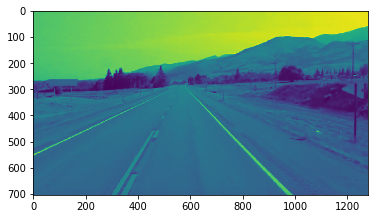

In [8]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2.imshow('result',gray)
cv2.waitKey(0)
plt.imshow(gray)


## Step-2: Reducing Noise in the image

### Smoothening Image - By using Gaussian filter
https://www.youtube.com/watch?v=C_zFhWdM4ic

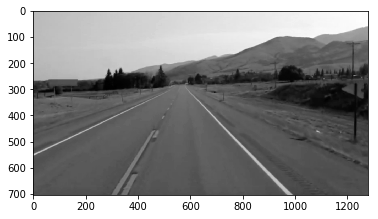

In [11]:
blur = cv2.GaussianBlur(gray,(5,5),0) # (5,5) -> kernel size , 0 -> stamdard deviation
# cv2.imshow('blurred_image',blur)
# cv2.waitKey(0)
plt.imshow(blur,cmap = 'gray')

### Finding edges - Lanes line using edge detection techniques such as "canny edge detection"

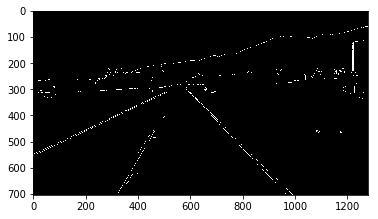

In [13]:
canny_img = cv2.Canny(blur,50,150)
# cv2.imshow("Canny Image",canny_img)
# cv2.waitKey(0)
plt.imshow(canny_img,cmap = 'gray')



# Defining Canny Function

In [33]:
def canny_edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0) # (5,5) -> kernel size , 0 -> stamdard deviation
    canny_img = cv2.Canny(blur,50,150)
    return canny_img

canny_img = canny_edge_detection(lane_image)    

In [36]:
cv2.imshow('canny',canny_img)
cv2.waitKey(0)

-1

## Region of Interest

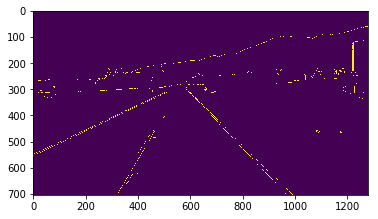

In [75]:
def region_of_interest(img):
    height = img.shape[0]
    polygons = np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,polygons,255)
    return mask

cv2.imshow('region of interest',region_of_interest(canny_img))
cv2.waitKey(0)
plt.imshow(canny_img)

## Finding Lane Lines - Bitwise_and

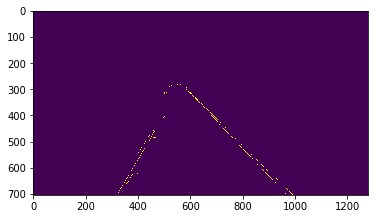

In [74]:
def region_of_interest(img):
    height = img.shape[0]
    polygons = np.array([
        [(200,height),(1100,height),(550,250)]
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

cropped_img = region_of_interest(canny_img)
cv2.imshow('region of interest',cropped_img)
cv2.waitKey(0)
plt.imshow(cropped_img)

## Hough Transformation
HoughLinesP(image, rho, theta, threshold, lines, minLineLength, maxLineGap)

In [52]:
#cv2.HoughLinesP(cropped_img)
help(cv2.HoughLinesP)


Help on built-in function HoughLinesP:

HoughLinesP(...)
    HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
    .   @brief Finds line segments in a binary image using the probabilistic Hough transform.
    .   
    .   The function implements the probabilistic Hough transform algorithm for line detection, described
    .   in @cite Matas00
    .   
    .   See the line detection example below:
    .   @include snippets/imgproc_HoughLinesP.cpp
    .   This is a sample picture the function parameters have been tuned for:
    .   
    .   ![image](pics/building.jpg)
    .   
    .   And this is the output of the above program in case of the probabilistic Hough transform:
    .   
    .   ![image](pics/houghp.png)
    .   
    .   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
    .   @param lines Output vector of lines. Each line is represented by a 4-element vector
    .   \f$(x_1, y_1, x_2, y

In [66]:
def display_lines(img,lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),10) 
            #image,first set of cordinates, second set ofcordinates, color of line, thickness of line
    final_image = cv2.bitwise_or(img,line_img)         
    return final_image
        
    

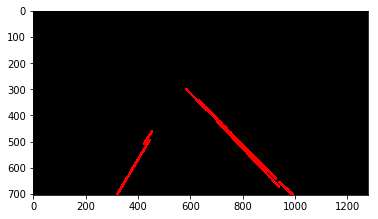

In [73]:
Hough_detected_lines = cv2.HoughLinesP(cropped_img,2,np.pi/180,100,np.array([]),minLineLength = 40,maxLineGap=5)
# rho = 2pixel ( not too big not too small - so that we can capture the intersection of lines in hough space)
# theta = 1 degree = np.pi/180 in radians
# threshhold = 100- minimum number of intersection in each bin to count it as a line
# np.array - placeholder - empty array
# minLineLength - length of the line in pixel which will be accepted
# maxLineGap  - Maximum allowed gap between points on the same line to link them.

line_img = display_lines(lane_image,Hough_detected_lines)

cv2.imshow('Hough Transformation',line_img)
cv2.waitKey(0)
plt.imshow(line_img)

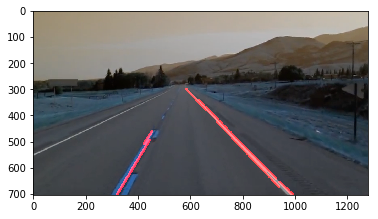

In [72]:
# Another Method 
def display_lines(img,lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),10)     
    return line_img

Hough_detected_lines = cv2.HoughLinesP(cropped_img,2,np.pi/180,100,np.array([]),minLineLength = 40,maxLineGap=5)
line_img = display_lines(lane_image,Hough_detected_lines)
combo_img = cv2.addWeighted(lane_image,0.8,line_img,1,1)

cv2.imshow('Hough Transformation',combo_img)
cv2.waitKey(0)
        
plt.imshow(combo_img)

In [69]:
help(cv2.addWeighted)

Help on built-in function addWeighted:

addWeighted(...)
    addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
    .   @brief Calculates the weighted sum of two arrays.
    .   
    .   The function addWeighted calculates the weighted sum of two arrays as follows:
    .   \f[\texttt{dst} (I)= \texttt{saturate} ( \texttt{src1} (I)* \texttt{alpha} +  \texttt{src2} (I)* \texttt{beta} +  \texttt{gamma} )\f]
    .   where I is a multi-dimensional index of array elements. In case of multi-channel arrays, each
    .   channel is processed independently.
    .   The function can be replaced with a matrix expression:
    .   @code{.cpp}
    .       dst = src1*alpha + src2*beta + gamma;
    .   @endcode
    .   @note Saturation is not applied when the output array has the depth CV_32S. You may even get
    .   result of an incorrect sign in the case of overflow.
    .   @param src1 first input array.
    .   @param alpha weight of the first array elements.
    .   @param src2 se